<b>Описание проекта</b>
<br><br>
Есть 2 группы студентов одна их которых ходила на подготовительные курсы, другая нет.
<br>
Нужно понять повлияло ли посещение курсов на балл студентов между группами.
<br><br>
Данные по результатам находятся по ссылке ниже и предоставлены в виде 3 файлов
https://gist.github.com/StMrKirk/6f861e06a4d30fae67b11bb6b75f48ef

<hr style='border: 1px solid'>

## 1. Подготовка к работе. Импорт библиотек и настройка параметров графиков

In [59]:
# Импортируем библиотеки

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
# Подготавливаем общие настройки для графиков

sns.set(
rc={
    'figure.figsize':(46,20)
},
font_scale=2
)

<hr style='border: 1px solid'>

## 2. Загрузка и предварительный анализ данных

### 2.1.  Загружаем и изучаем  данные о группах студентов (ходил/не ходил на курсы)

In [3]:
# Загружаем данные

groups = pd.read_csv('https://gist.githubusercontent.com/StMrKirk/6f861e06a4d30fae67b11bb6b75f48ef/raw/66d152e8340035955fda2bd4fb4683f72a86141f/student_group.csv')

In [5]:
groups.head()

,student_id,group
0,1,no_course
1,2,course
2,3,course
3,4,course
4,5,course


In [6]:
# Смотрим на размер данных

groups.shape

(1000, 2)

In [7]:
# Проверяем данные на наличие пропусков

groups.isna().sum()

student_id    0
group         0
dtype: int64

In [8]:
# Проверяем данные на наличие дублирующихся строк

groups.loc[groups.duplicated()]

,student_id,group


<hr>

### 2.2. Загружаем и изучаем данные о баллах студентов до старта курсов

In [10]:
# Загружаем данные

student_before_score = pd.read_csv('https://gist.githubusercontent.com/StMrKirk/6f861e06a4d30fae67b11bb6b75f48ef/raw/66d152e8340035955fda2bd4fb4683f72a86141f/student_before_score.csv')

In [12]:
student_before_score.head()

,student_id,before_score
0,1,75
1,2,81
2,3,58
3,4,47
4,5,76


In [13]:
# Смотрим типы данных

student_before_score.dtypes

student_id      int64
before_score    int64
dtype: object

In [14]:
# Смотрим на размер данных

student_before_score.shape

(1000, 2)

In [15]:
# Проверяем данные на наличие пропусков

student_before_score.isna().sum()

student_id      0
before_score    0
dtype: int64

In [16]:
# Проверяем данные на наличие дублирующихся строк

student_before_score.loc[student_before_score.duplicated()]

,student_id,before_score


<hr>

### 2.3. Загружаем и изучаем данные о баллах студентов после звершения курсов¶

In [18]:
# Загружаем данные

student_after_score = pd.read_csv('https://gist.githubusercontent.com/StMrKirk/6f861e06a4d30fae67b11bb6b75f48ef/raw/66d152e8340035955fda2bd4fb4683f72a86141f/student_after_score.csv')

In [19]:
student_after_score.head()

,student_id,after_score
0,1,92
1,2,79
2,3,92
3,4,90
4,5,98


In [20]:
# Смотрим типы данных

student_after_score.dtypes

student_id     int64
after_score    int64
dtype: object

In [21]:
# Смотрим на размер данных

student_after_score.shape

(1000, 2)

In [22]:
# Проверяем данные на наличие пропусков

student_after_score.isna().sum()

student_id     0
after_score    0
dtype: int64

In [23]:
# Проверяем данные на наличие дублирующихся строк

student_after_score.loc[student_after_score.duplicated()]

,student_id,after_score


<hr style='border: 1px solid'>

## 3. Преобразование данных. Анализ преобразованных данных

Для дальнейшего анализа нам необходимо объединить данные в один df.

### 3.1. Объединение данных

In [24]:
# Объединять будем по столбцу student_id. Поскольку значения этого столбца во всех трех df совпадают,
# будет объединять по внутреннему соединению

full_data = groups.merge(student_before_score, how='inner',on='student_id') \
.merge(student_after_score, how='inner',on='student_id')

In [25]:
full_data

,student_id,group,before_score,after_score
0,1,no_course,75,92
1,2,course,81,79
2,3,course,58,92
3,4,course,47,90
4,5,course,76,98
...,...,...,...,...
995,996,no_course,48,92
996,997,no_course,55,93
997,998,no_course,47,84
998,999,no_course,64,74


Теперь создадим отдельно df из студентов, ходивших на курсы, и студнтов, не ходивших на курсы, и изучим распределения баллов.

### 3.2. Изучение данных о студентах, не ходивших на курсы

In [26]:
students_no_course = full_data.query('group == "no_course"')

In [28]:
students_no_course.head()

,student_id,group,before_score,after_score
0,1,no_course,75,92
7,8,no_course,88,90
9,10,no_course,67,94
10,11,no_course,72,95
13,14,no_course,76,79


In [29]:
# Выведем описательную статистику баллов до старта курсов и после

students_no_course.describe()

,student_id,before_score,after_score
count,512.000000,512.000000,512.000000
mean,515.501953,64.519531,85.308594
std,285.865836,14.561819,8.696586
min,1.000000,40.000000,70.000000
25%,268.750000,52.000000,78.000000
50%,525.000000,64.000000,86.000000
75%,754.250000,78.000000,92.000000
max,999.000000,89.000000,99.000000


Видим, что максимальный балл до старта курсов - 89, после завершения - 99, медианное и средние значения также повысились: средний балл до старта курсов - 65, после - 85, медианные значения - 64 и 86.
<br><br>
Размер выборки - 512 студентов.
<br><br>
Кроме того, совпадение медиан и средних баллов говорит нам либо о нормальности, либо о равномерности распределений. Необходимо визуализировать данные.



/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


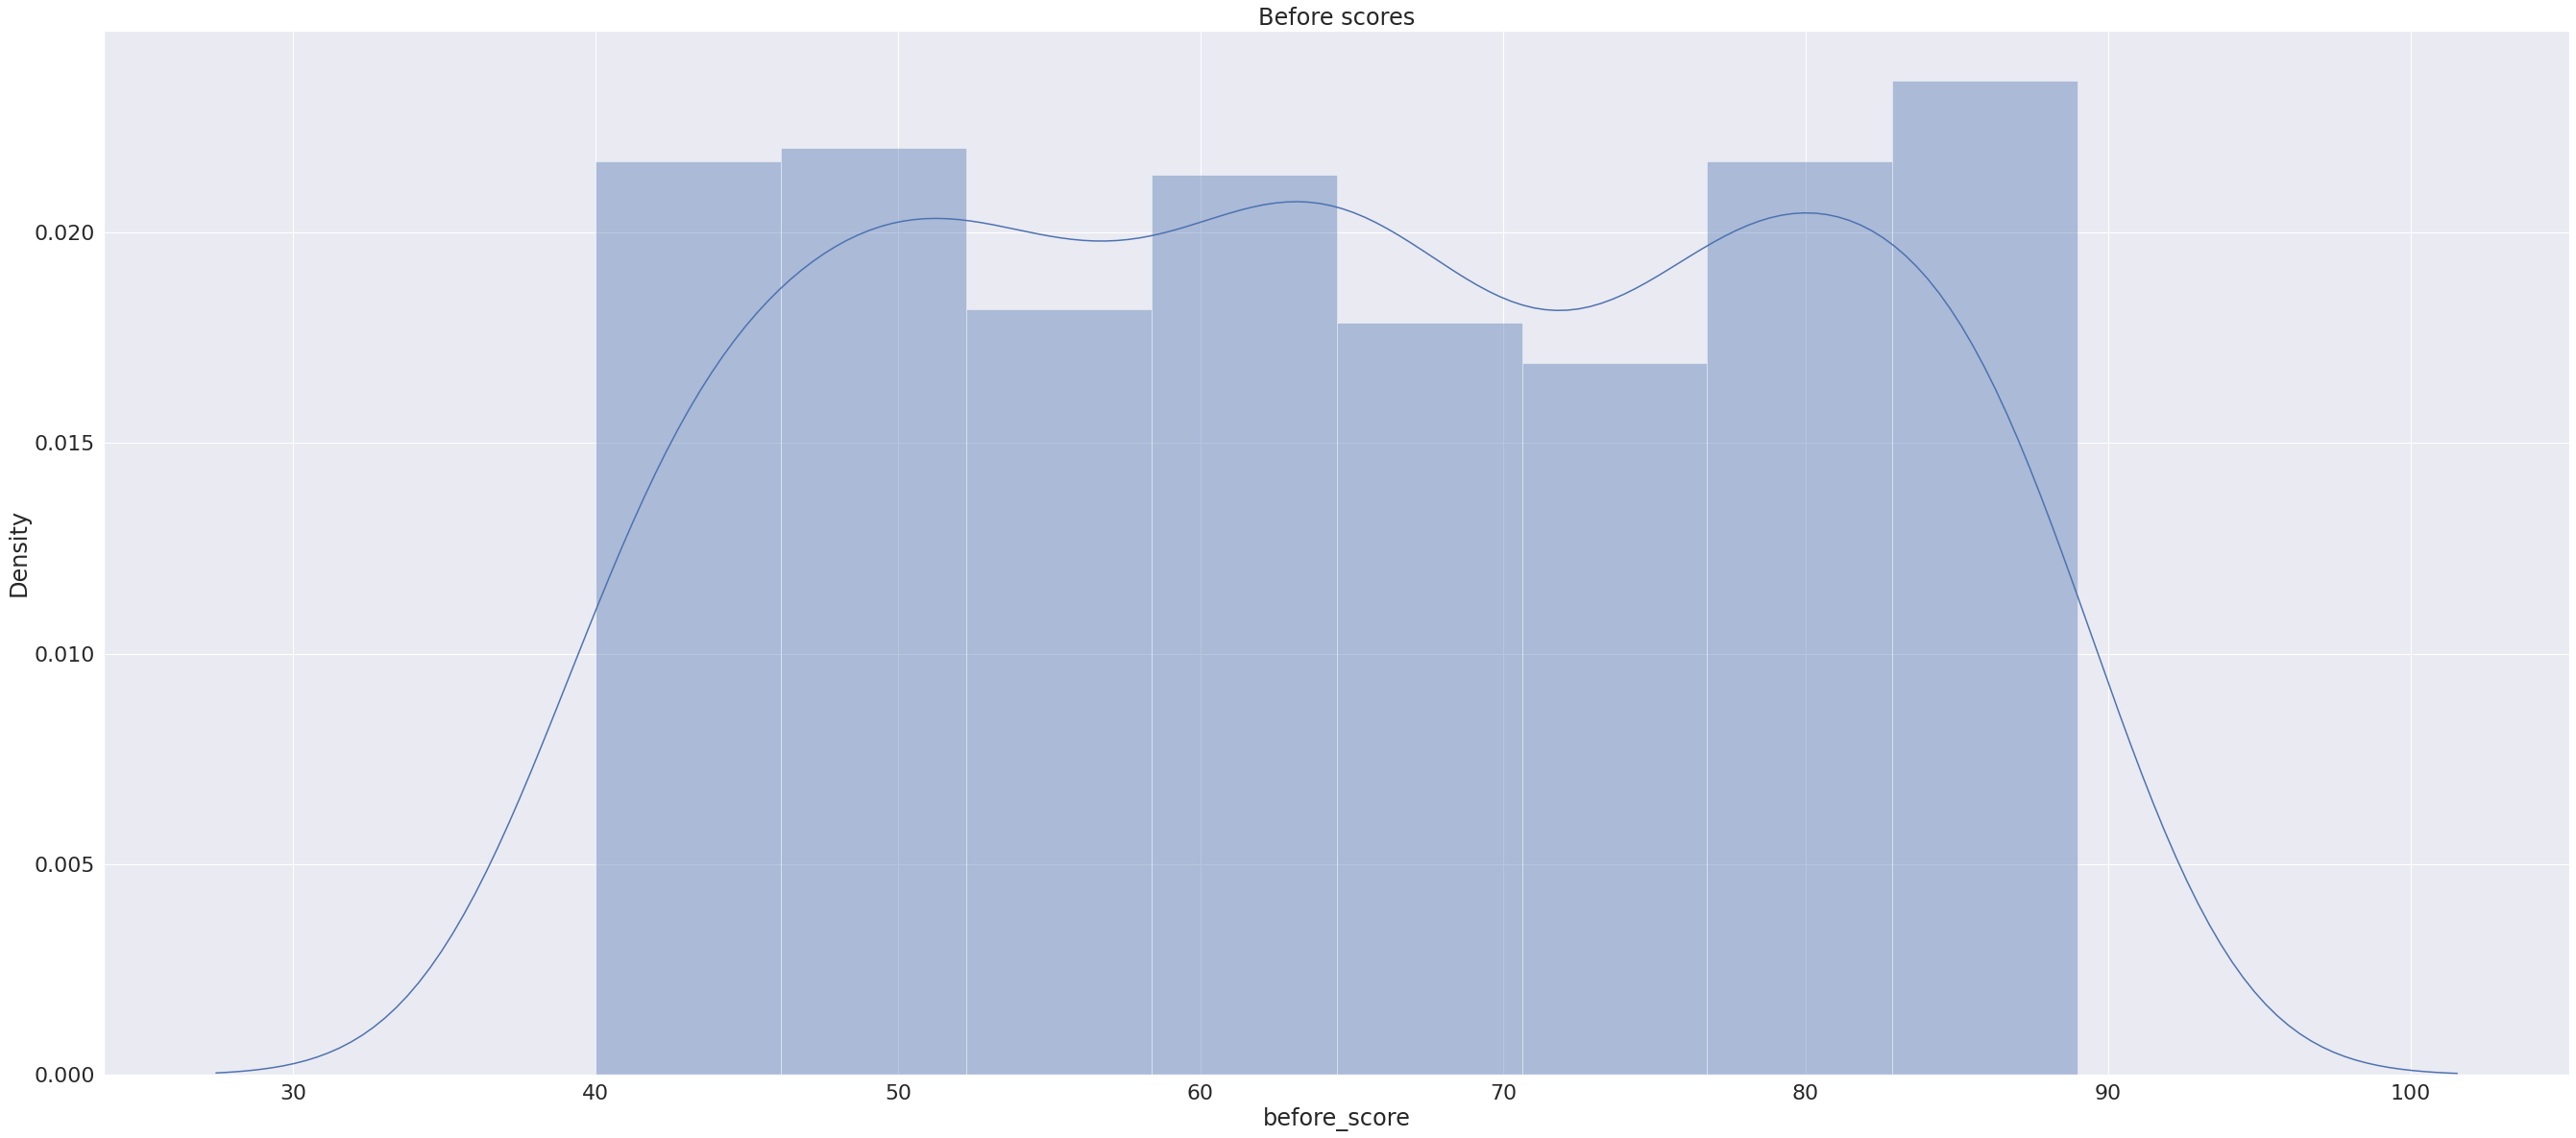

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


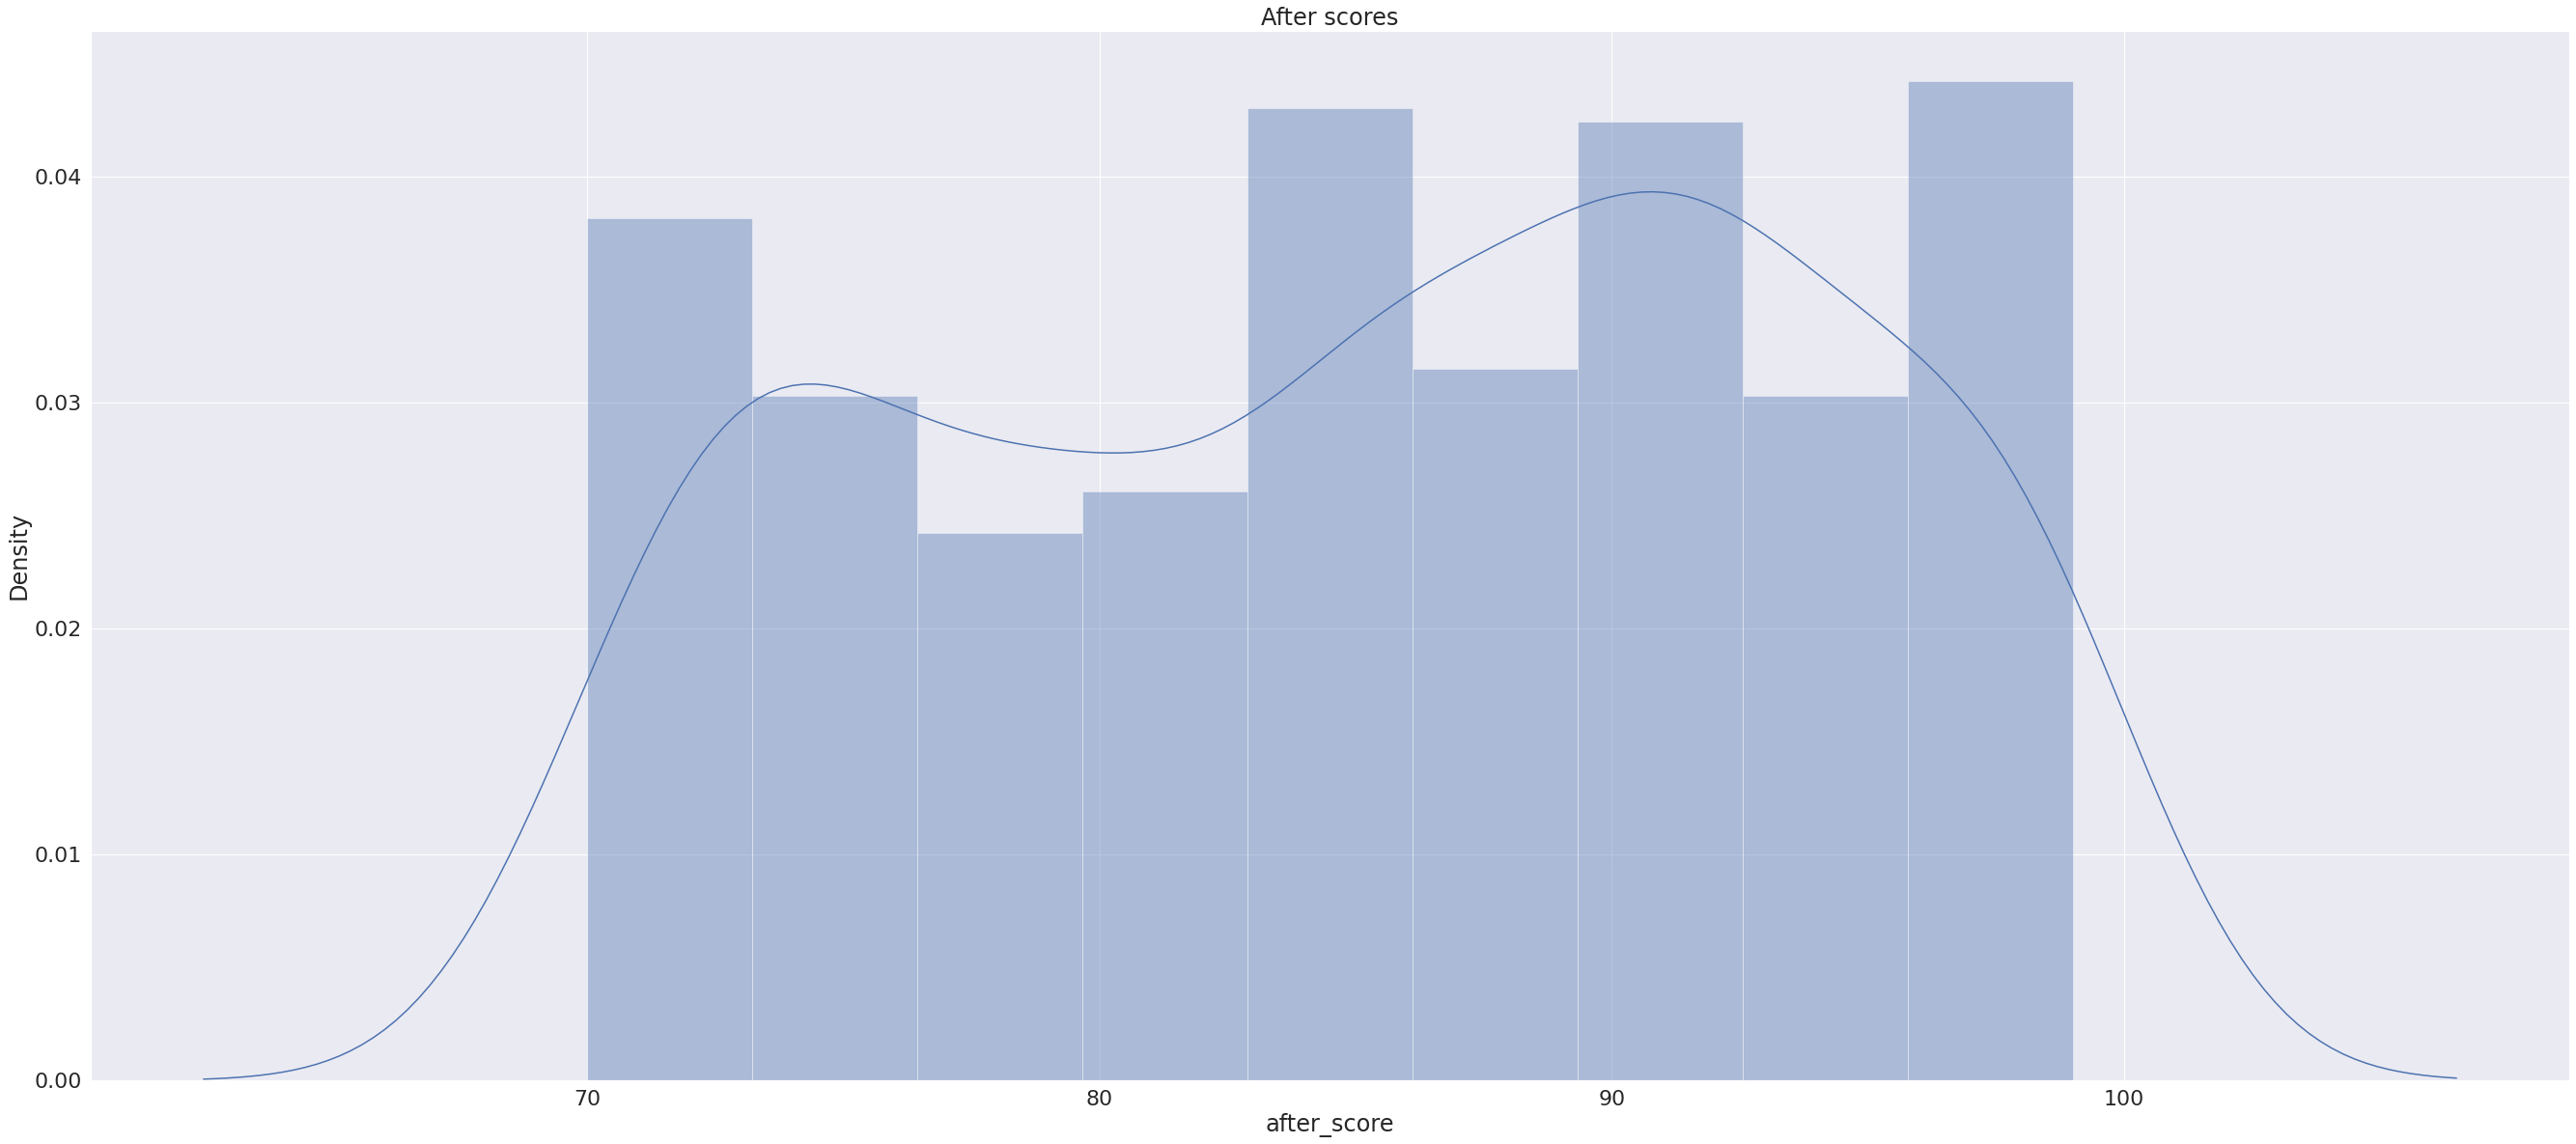

In [40]:
# Визуализируем распределение баллов до старта и после курсов

plt.title('Before scores')
sns.distplot(students_no_course.before_score)
plt.show()

plt.title('After scores')
sns.distplot(students_no_course.after_score)
plt.show()

Видим, что распределения баллов до старта курсов имеет распределение, схожее с равномерным + размах между минимальным баллом и максимальным составляет почти 50 баллов. 
<br><br>
Распределение баллов после завершения курсов скорее скошено влево и размах между мин. и макс. баллами меньше - около 30 баллов в сторону более высокого балла (70-100). Выбросов нет.

<hr>

### 3.3. Изучение данных о студентах, ходивших на курсы

In [41]:
students_course = full_data.query('group == "course"')

In [42]:
students_course.head()

,student_id,group,before_score,after_score
1,2,course,81,79
2,3,course,58,92
3,4,course,47,90
4,5,course,76,98
5,6,course,67,76


In [44]:
# Выведем описательную статистику баллов до старта курсов и после

students_course.describe()

,student_id,before_score,after_score
count,488.000000,488.000000,488.000000
mean,484.760246,63.301230,83.903689
std,291.348817,14.625841,8.532397
min,2.000000,40.000000,70.000000
25%,235.750000,51.000000,76.000000
50%,482.500000,63.500000,84.000000
75%,743.250000,75.000000,90.000000
max,1000.000000,89.000000,99.000000


Видим, что максимальный балл до старта курсов - 89, после завершения - 99, как и в группе, которая не ходила на курсы. 
<br>
Медианное и средние значения также повысились: средний балл до старта курсов ~ 63, после - 84, медианы - 63.5 и 84
<br><br>
Размер выборки - 488 студентов.


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


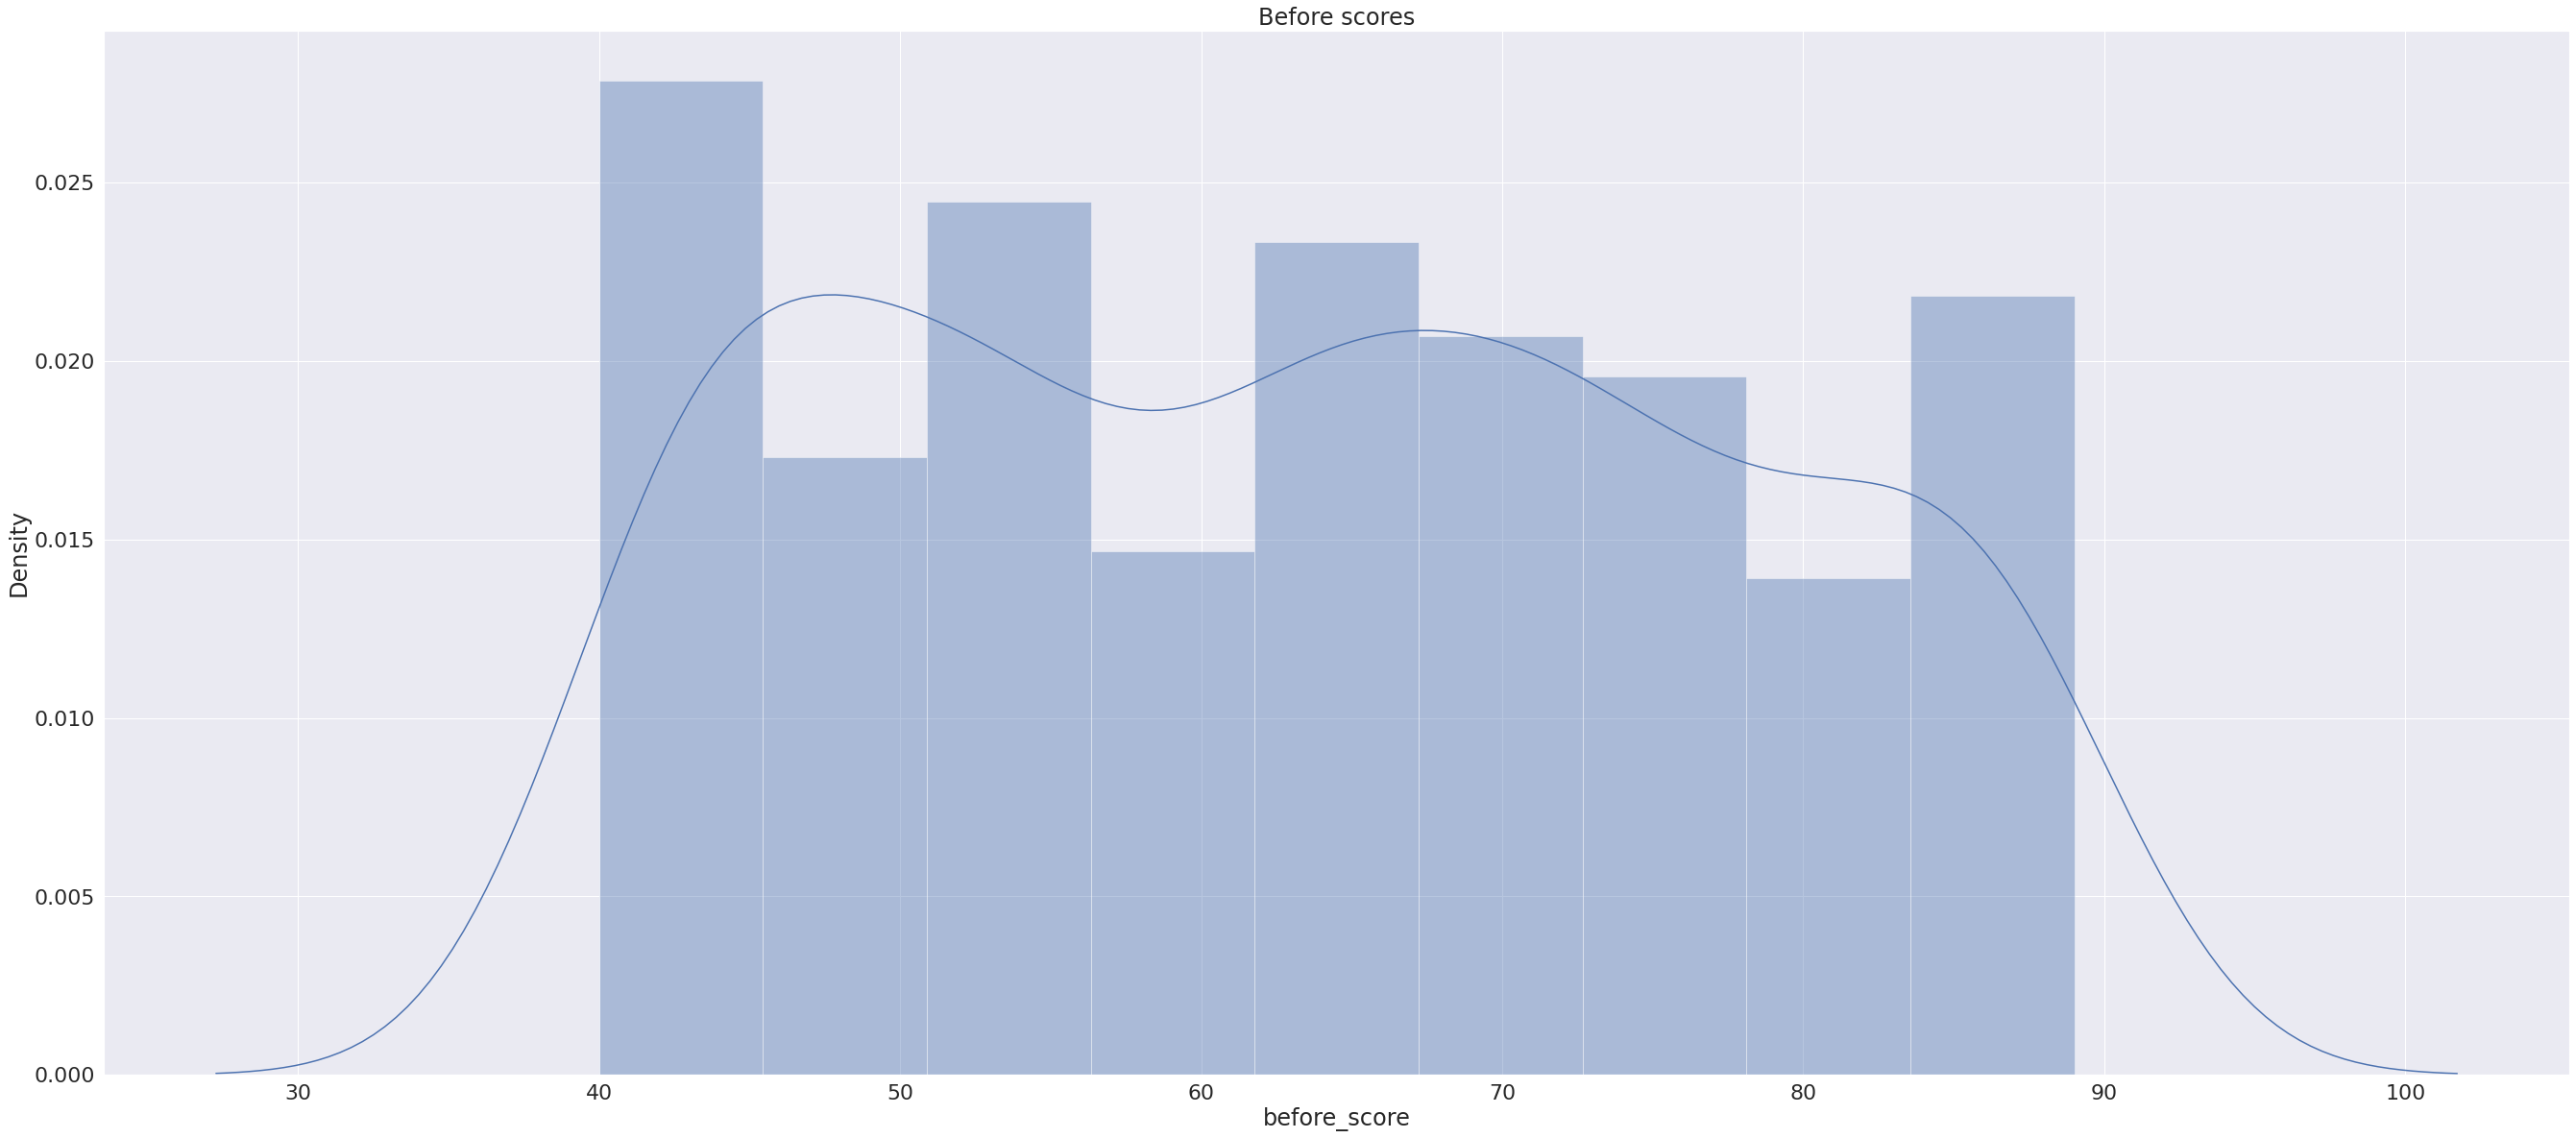

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


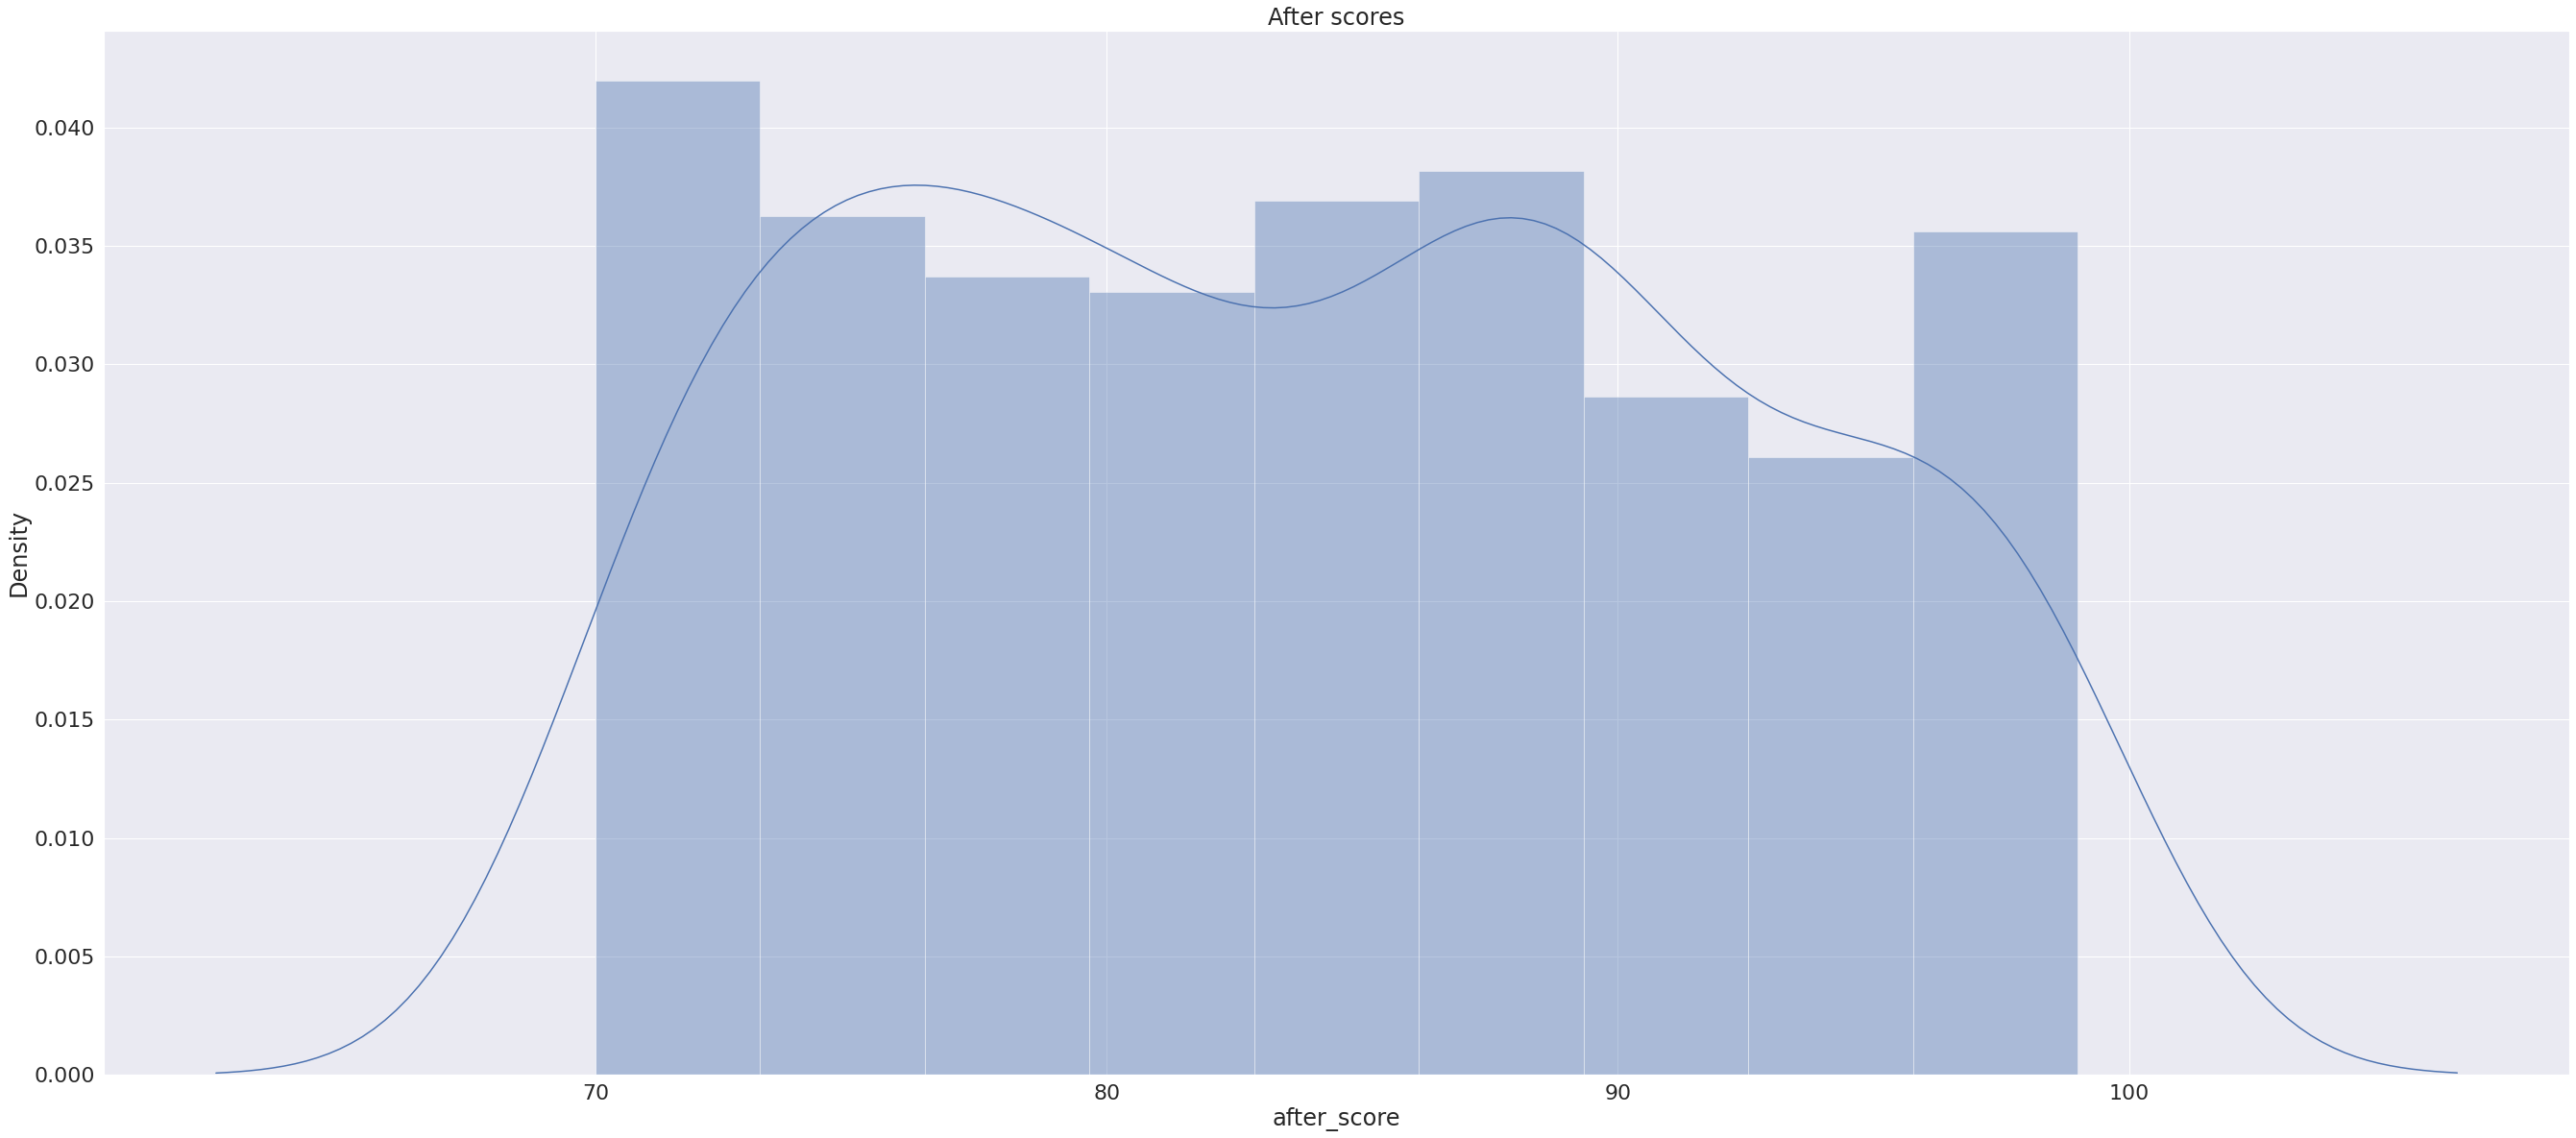

In [45]:
# Визуализируем распределение баллов до старта и после курсов

plt.title('Before scores')
sns.distplot(students_course.before_score)
plt.show()

plt.title('After scores')
sns.distplot(students_course.after_score)
plt.show()

Видим, что как и в группе студентов, не ходивших на курсы, до старта курсов размах между минимальным баллом и максимальным составляет почти 50 баллов, а после завершения - около 30 баллов в сторону более высокого балла (70-100). Выбросов нет.

<hr style='border: 1px solid'>

## 4. Выбираем и проводим стат. тест. Формулируем выводы

Распределения баллов после завершения курсов в обеих группах не имеют нормальный характер, однако в каждой выборке у нас больше 30 значений (488 и 512), к тому же явных выбросов в данных нет. Таким образом, необходимо проверить гомогенность дисперсий в обеих группах, чтобы понять, сможем ли мы применить параметрический тест для сравнения средних в двух группах, то есть, t-критерий Стьюдента .

In [60]:
# Используем тест Левена из библиотеки scipy stats для проврки гомогенности дисперсий

stats.levene(students_course.after_score,students_no_course.after_score, center='mean')

LeveneResult(statistic=0.2226182850113045, pvalue=0.6371552545500494)

Поскольку p-value > 0.05, у нас нет оснований считать, что в дисперсиях двух групп есть различия, соответственно у нас есть все основания применить <u>t-критерий Стьюдента</u> для проверки наличия стат. значимых различий в двух группах.

In [61]:
# Еще раз выводим среднее значение баллов после курсов среди тех, кто ходил на курсы

mean_course = students_course.after_score.mean()

In [62]:
mean_course

83.90368852459017

In [63]:
# Еще раз выводим среднее значение баллов после курсов среди тех, кто не ходил на курсы

mean_no_course = students_no_course.after_score.mean()

In [65]:
mean_no_course

85.30859375

Видим, что студенты, не ходившие на курсы, предварительно набрали даже больше баллов в среднем, чем ходившие на курсы. С помощью t-критерия Стьюдента выясним, является ли данная разница стат. значимой.
<br><br>

<b>H0</b>: Курсы не влияют на баллы студентов.
<br>
<b>H1</b>: Курсы влияют на баллы студентов.

Уровень значимости устанавливаем в 0.05 (5%). 

In [66]:
# С помощью метода ttest_ind библиотеки scipy.stats проведем тест

stats.ttest_ind(students_no_course.after_score, students_course.after_score)

Ttest_indResult(statistic=2.577169949271302, pvalue=0.010103890204528086)

<b>Как видно по результатам теста, p-value < 0.05, соответственно: всего 1% вероятности получить такие же или более экстремальные различия баллов при условии, что H0 верна.
Таким обрахом, у нас есть все основания отвергнуть нулевую гипотезу и сделать вывод о том, что наличествуют стат. значимые различия в набранных баллах в пользу той группы студентов, которые курсы <u>не посещали</u>.
<br><br>
Вывод: посещение курсов отрицательно сказывается на сдаче экзамена студентами.</b>